In [2]:
import pandas as pd
import seaborn as sns
import sklearn
!pip install shap

In [3]:
import os
os.getcwd()

'c:\\Users\\MVM\\OneDrive\\Рабочий стол\\WEB_AND_PYTHON\\dataton'

In [4]:
interactiondata = pd.read_csv(r"dataset/interactiondata.csv")
overdata = pd.read_csv(r"dataset/overdata.csv")
userdata = pd.read_csv(r"dataset/userdata.csv")



In [19]:
interactiondata = interactiondata.rename(columns={"UserId":"userid"})
overdata = overdata.rename(columns={"userId":"userid"})
merge_data = userdata.merge(interactiondata, on="userid")
data = overdata.merge(merge_data)

In [22]:
data.to_csv("df_merge_all.csv")

In [23]:
df = pd.read_csv(r"dataset/true_vamp.csv")
df
fruits_df = df[df["category"] == "fruits"]
sweets_df = df[df["category"] == "sweets"]
vegetables_df = df[df["category"] == "vegetables"]
meat_df = df[df["category"] == "meat"]
other_df = df[df["category"] == "other"]
alcohol_df = df[df["category"] == "alcohol"]
fish_df = df[df["category"] == "fish"]


fruits_df.to_csv("fruits_df.csv")
sweets_df.to_csv("sweets_df.csv")
vegetables_df.to_csv("vegetables_df.csv")
meat_df.to_csv("meat_df.csv")
other_df.to_csv("other_df.csv")
alcohol_df.to_csv("alcohol_df.csv")
fish_df.to_csv("fish_df.csv")

In [30]:
alco_df = pd.read_csv(r"df_merge_all.csv")
alco_df["category"].unique()

array(['fish', 'sweets', 'vegetables', 'meat', 'other', 'alcohol',
       'fruits'], dtype=object)

In [32]:
alco_df[alco_df["category"] == 'alcohol'][["category", "age"]]

,category,age
5,alcohol,49
13,alcohol,57
16,alcohol,50
25,alcohol,64
34,alcohol,58
...,...,...
23802,alcohol,65
23811,alcohol,41
23819,alcohol,46
23821,alcohol,23


In [33]:
 
grouped_data = alco_df.groupby('userid').agg({'age': 'mean', 'mobile_purchases_count_avg': 'mean'}).reset_index()
 
df3 = pd.DataFrame(grouped_data)
df3

,userid,age,mobile_purchases_count_avg
0,0017f690-7fcd-46c0-a058-de52c7836335,13.0,1.0
1,001b4dc7-b42b-462b-b596-a1f2f5febe42,18.0,2.0
2,00323e9c-345c-4917-992a-96f6c1effc5f,58.0,17.0
3,00367b3d-ab5f-4fbf-a23a-20cba62c7912,46.0,0.0
4,0037779c-792a-4407-bd64-7d2e9375a117,34.0,18.0
...,...,...,...
3400,ffdce3ed-108d-4628-ab86-f53efcf0fec4,18.0,2.0
3401,ffdf9850-5bb1-4f05-9c1c-cb8edd4bcfe9,40.0,9.0
3402,ffec5938-8d42-441d-93d7-e293acb0a01c,74.0,19.0
3403,fff5de1d-0d9e-4004-b0cc-05010195fea9,66.0,-1.0


In [103]:
df1["avg_bill"].std()

635.5418632022473

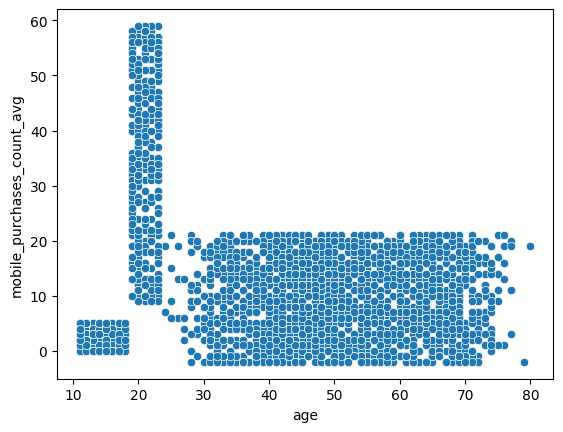

In [94]:
sns.scatterplot(x=df3["age"], y=df3["mobile_purchases_count_avg"]);

In [35]:
import numpy as np
q_20 = 20
q_40 = 40
q_60 = 60
q_80 = 80
q_100 = 100



for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"макс знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')



    print("\n")


  категория  | возраст          | макс знач. для возрастов
   fruits    | до 17 лет        |            1035
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | макс знач. для возрастов
   sweets    | до 17 лет        |             441
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | макс знач. для возрастов
   vegetables | до 17 лет        |             588
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст          | макс знач. для возрастов
   

In [36]:
for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"cреднее(mean) знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.mean():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')



    print("\n")


  категория  | возраст          | cреднее(mean) знач. для возрастов
   fruits    | до 17 лет        |             514
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | cреднее(mean) знач. для возрастов
   sweets    | до 17 лет        |             171
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | cреднее(mean) знач. для возрастов
   vegetables | до 17 лет        |             291
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст          | c

In [37]:

for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"cреднее(median) знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.median():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')



    print("\n")


  категория  | возраст          | cреднее(median) знач. для возрастов
   fruits    | до 17 лет        |             510
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | cреднее(median) знач. для возрастов
   sweets    | до 17 лет        |             168
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | cреднее(median) знач. для возрастов
   vegetables | до 17 лет        |             294
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст       

# БАРПЛОТ ПО ВОЗРАСТАМ

<Axes: xlabel='age'>

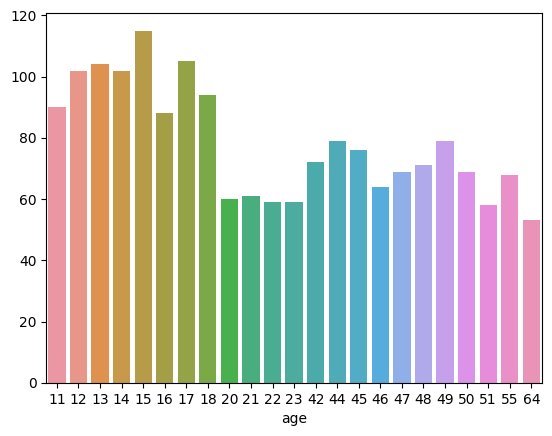

In [39]:

sns.barplot(x=data["age"].value_counts().keys()[:23], y=data["age"].value_counts().values[:23])


# CLEAR DATA


In [41]:
df = pd.read_csv(r"dataset/true_vamp.csv")
df = df[df.columns[1:]]
fruits_df = df[df["category"] == "fruits"]
sweets_df = df[df["category"] == "sweets"]
vegetables_df = df[df["category"] == "vegetables"]
meat_df = df[df["category"] == "meat"]
other_df = df[df["category"] == "other"]
alcohol_df = df[df["category"] == "alcohol"]
fish_df = df[df["category"] == "fish"]


# СРАВНЕНИЕ СТАТИСТИЧЕСКИХ ПОКАЗАТЕЛЕЙ ПО ПЕРЦЕНТИЛЯМ

In [42]:
import numpy as np
q_20 = 20
q_40 = 40
q_60 = 60
q_80 = 80
q_100 = 100



for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"макс знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')



    print("\n")


  категория  | возраст          | макс знач. для возрастов
   fruits    | до 17 лет        |            1035
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | макс знач. для возрастов
   sweets    | до 17 лет        |             441
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | макс знач. для возрастов
   vegetables | до 17 лет        |             588
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст          | макс знач. для возрастов
   

In [43]:
for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"cреднее(median) знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.median():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')



    print("\n")



  категория  | возраст          | cреднее(median) знач. для возрастов
   fruits    | до 17 лет        |             510
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | cреднее(median) знач. для возрастов
   sweets    | до 17 лет        |             168
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | cреднее(median) знач. для возрастов
   vegetables | до 17 лет        |             294
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст       

In [44]:
for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"cреднее(mean) знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.mean():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')



    print("\n")

  категория  | возраст          | cреднее(mean) знач. для возрастов
   fruits    | до 17 лет        |             514
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | cреднее(mean) знач. для возрастов
   sweets    | до 17 лет        |             171
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | cреднее(mean) знач. для возрастов
   vegetables | до 17 лет        |             291
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст          | c

In [45]:
avg_bill_els = [] 
for el in df[["avg_bill", "marital", "userid"]].groupby(by=["userid", "marital"]).avg_bill.sum():
    avg_bill_els.append(el)

mi = df[["avg_bill", "marital", "userid"]].groupby(by=["userid", "marital"]).sum().index
mi_status = []
for el in range(len(mi)):
    mi_status.append(mi[el][1])
 

In [46]:
df_status = pd.DataFrame({"status":mi_status, "avg_bill": avg_bill_els})#.groupby("status").avg_bill.mean()


<Axes: xlabel='status', ylabel='avg_bill'>

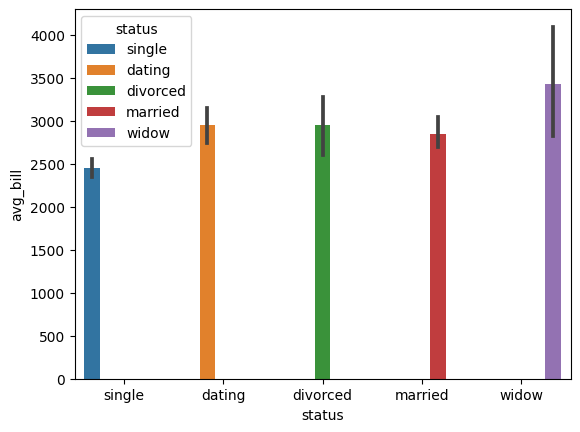

In [47]:
sns.barplot(data=df_status, x="status", y="avg_bill", hue="status")

# КОНКУРС НА САМУЮ МОЛОДУЮ ВДОВУ(ML LEDI)

In [48]:
df[df["marital"] == "widow"]["age"].min()

42

In [49]:
df[df["marital"] == "divorced"]["age"].min()
df[df["marital"] == "dating"]["age"].min()


26

# ОБУЧЕНИЕ CATBOOST

In [100]:
df_t = pd.read_csv(r"dataset\true_vamp.csv")
df_t.head(2)

,Unnamed: 0,userid,category,avg_bill,join_datetime,age,income,kids,teenagers,marital,...,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
1,1,2c6336a2-852b-48af-9150-9b9030387f5d,sweets,55.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0


In [57]:
from sklearn.preprocessing import LabelBinarizer 
 
df1 = df_t.copy() 
  

label_binarizer = LabelBinarizer() 
  
 
label_binarizer_output = label_binarizer.fit_transform(df1['category']) 
   
result_df = pd.DataFrame(label_binarizer_output, 
                         columns = label_binarizer.classes_) 


  
def get_lab_bin_data(df1, column):
    label_binarizer = LabelBinarizer() 
    label_binarizer_output = label_binarizer.fit_transform( df1[column]) 
    
    result_df = pd.DataFrame(label_binarizer_output, 
                            columns = label_binarizer.classes_) 
    
    result_df["index"] = result_df.index
    df1["index"] = df1.index

    return df1.merge(result_df, on="index")

df1 = get_lab_bin_data(df1, "marital")
df1 = get_lab_bin_data(df1, "category")



In [54]:
df1["rand_1"] = np.random.randint(len(df1), size=len(df1))
df1["rand_2"] = np.random.randint(len(df1), size=len(df1))
df1["rand_3"] = np.random.randint(len(df1), size=len(df1))
df1["rand_4"] = np.random.randint(len(df1), size=len(df1))


In [66]:
df1 = df1[[i for i in df1.columns if df1[i].dtype != ("O")]]
df1 = df1.drop("Unnamed: 0", axis=1)

In [67]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 927


X = df1.drop("avg_bill", axis=1)
y = df1["avg_bill"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE+3)

In [68]:
from catboost import CatBoostRegressor 
  
 
model = CatBoostRegressor(loss_function='RMSE') 
  
 
model.fit(X_train, y_train, verbose=100) 

Learning rate set to 0.062307
0:	learn: 617.2311952	total: 173ms	remaining: 2m 52s
100:	learn: 362.1848186	total: 858ms	remaining: 7.63s
200:	learn: 343.0463306	total: 1.36s	remaining: 5.42s
300:	learn: 328.5039134	total: 1.87s	remaining: 4.35s
400:	learn: 317.3740447	total: 2.4s	remaining: 3.59s
500:	learn: 307.3649060	total: 3.03s	remaining: 3.02s
600:	learn: 297.1437009	total: 3.54s	remaining: 2.35s
700:	learn: 287.8532889	total: 4.05s	remaining: 1.73s
800:	learn: 279.8551837	total: 4.55s	remaining: 1.13s
900:	learn: 272.5484629	total: 5.05s	remaining: 555ms
999:	learn: 265.5584653	total: 5.59s	remaining: 0us


In [69]:
from sklearn.metrics import mean_squared_error as mse 
  
y_pred = model.predict(X_val) 
  
 
print("Validation RMSE: ", np.sqrt(mse(y_val, y_pred))) 

Validation RMSE:  364.1750200209112


In [72]:
import shap
import matplotlib.pyplot as plt

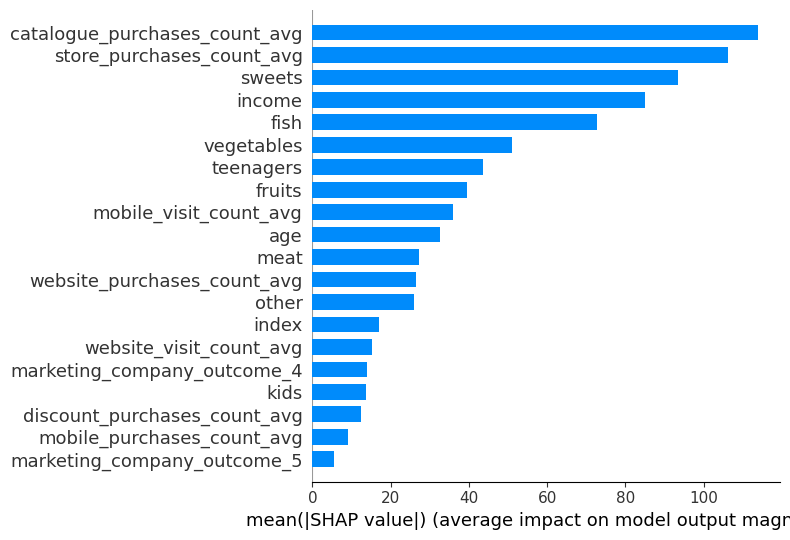

In [73]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
 

shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size= 0.2)
plt.show()

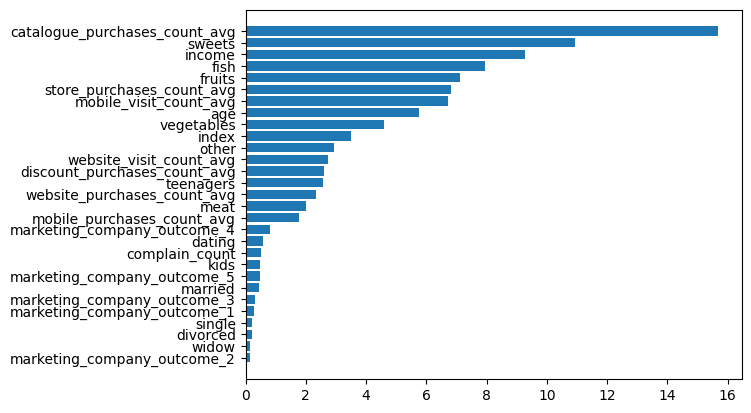

In [74]:

from matplotlib import pyplot as plt

importances = model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

10431

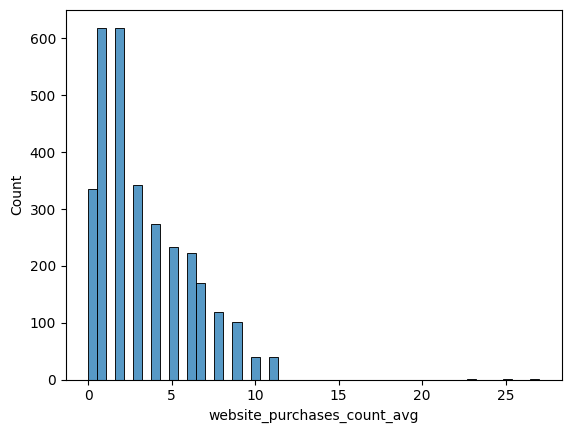

In [98]:
sns.histplot(data=data["website_purchases_count_avg"]);
data["website_purchases_count_avg"].sum()

13914

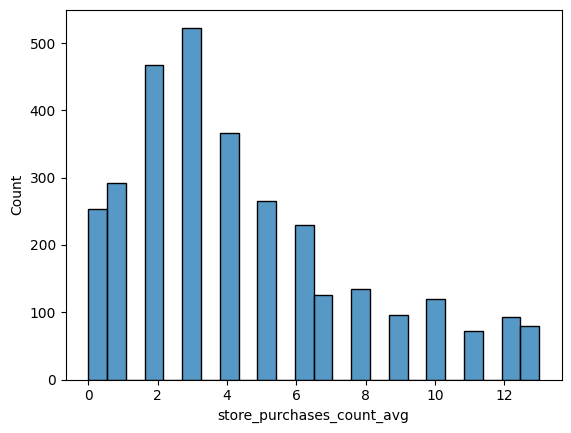

In [97]:
sns.histplot(data=data["store_purchases_count_avg"]);
data["store_purchases_count_avg"].sum()

10894

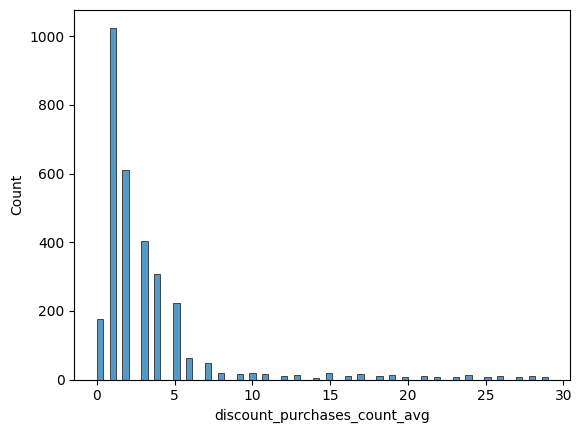

In [96]:
sns.histplot(data=data["discount_purchases_count_avg"]);
data["discount_purchases_count_avg"].sum()

6354

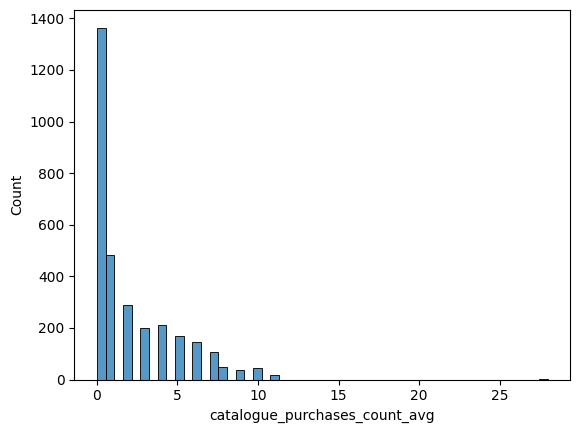

In [99]:
sns.histplot(data=data["catalogue_purchases_count_avg"]);
data["catalogue_purchases_count_avg"].sum()

In [74]:
y_pred

array([1366.11360798,   95.61863894, 1060.93383979, ...,  152.95621744,
        178.31228509,  142.22010921])